 Наверняка вы уже сталкивались с ситуацией, когда приходилось применить какую-то функцию сразу к нескольким элементам списка.

Это очень распространённая ситуация при работе с наборами данных.

Например, у вас есть список с изображениями, все эти изображения разных размеров. Однако чтобы подать ваши картинки, например, в нейронную сеть, их необходимо привести к единому размеру, то есть к каждой картинке из списка вам необходимо применить функцию для изменения её размера.

Ранее мы проводили подобные операции с помощью цикла for: создавали цикл по элементам списка и в цикле применяли функцию к элементу.

→ Оказывается, в Python можно, используя возможности итераторов, применять функции к элементам списка и без циклов. И это даёт нам сразу несколько преимуществ:

Простота кода — код становится короче (вплоть до одной строки) и выглядит более лаконичным.
Скорость — возможности, которые мы с вами рассмотрим, в большинстве случаев работают быстрее, чем использование функции в цикле.

 В этом юните вы научитесь:

применять функцию к итерируемому объекту без цикла с помощью map;

отбирать элементы из итерируемого объекта по условию с помощью filter;

работать с несколькими итерируемыми объектами одновременно;

расширять возможности использования функций с помощью дополнительных встроенных модулей.

ФУНКЦИЯ MAP

?
Часто возникает вопрос: как применить одну и ту же функцию к каждому элементу итерируемого объекта?

Представим, что у нас есть набор данных (пусть это будет список) об оценках нашей видеоигры десятками тысяч пользователей. Каждая оценка представлена отдельным элементом в списке масштабе от 0 до 10, а нам было бы удобнее видеть её в масштабе от 0 до 100 (такая операция называется масштабированием).

Итак, у нас есть итерируемый объект — список, и нам необходимо совершить преобразование (масштабирование) с каждым его элементом.

Решение такого типа задач вам уже известно — проход по элементам в цикле. Но существует более простой, лаконичный и, главное, быстрый способ, который мы и изучим в этом юните.

Начнём, как и всегда, с примера.

В задачах обработки естественного языка иногда имеет значение не только само слово, но и его длина.

Перед нами стоит следующая небольшая задача: вычислить длину каждого слова из нашего набора данных, чтобы в дальнейшем использовать эту информацию для анализа текста.

Пусть нам дан список names с именами. Давайте составим новый список длин имён lens_list из списка names. Самое простое решение — воспользоваться циклом.

In [1]:
names = ['Ivan', 'Nikita', 'Simon', 'Margarita', 'Vasilisa', 'Kim']

# Создаём пустой список, куда будем заносить результаты
lens_list = []
# Создаём цикл по элементам списка names
for name in names:
    # Вычисляем длину текущего слова
    length = len(name)
    # Добавляем вычисленную длину слова в список
    lens_list.append(length)
 
print(lens_list)

[4, 6, 5, 9, 8, 3]


Напишем функцию get_length, которая возвращает длину переданного в неё слова:

In [2]:
# Объявляем функцию для вычисления длины
def get_length(word):
    return len(word)

Теперь применим эту функцию к списку names с помощью специальной встроенной в Python функции map(). Она позволяет преобразовать каждый элемент итерируемого объекта по заданной функции.

Аргументы функции map():

Функция, которую необходимо применить к каждому элементу.
Итерируемый объект (например, список).
 Функция map() возвращает объект типа map.

In [3]:
# Объявляем функцию для вычисления длины
def get_length(word):
    return len(word)
# Применяем функцию get_length к каждому элементу списка
lens = map(get_length, names)
# Проверим, что переменная lens — это объект типа map:
# Для этого воспользуемся функцией isinstance
print(isinstance(lens, map))
# Будет напечатано:
# True

True


In [4]:
lens

In [5]:
list(map(get_length, names))

[4, 6, 5, 9, 8, 3]

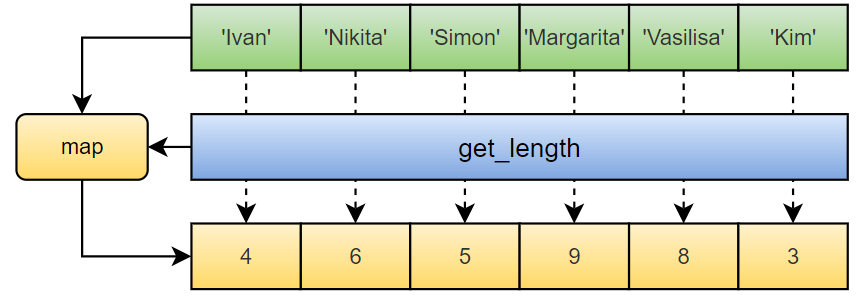

Кроме того, объекты итератора можно сразу занести в список, обернув результат работы функции map() в функцию list():

In [6]:
# Оборачиваем содержимое итератора map в список
lens_list = list(map(get_length, names))
print(lens_list)
# Будет напечатано:

[4, 6, 5, 9, 8, 3]


→ Вероятно, вы обратили внимание, что функция get_length является очень простой и короткой: она в одну строку выполняет действие и возвращает значение.

In [7]:
lens = list(map(lambda x: len(x), names))
print(lens)
# Будет напечатано:


[4, 6, 5, 9, 8, 3]


Итак, вы увидели, что использование map() вместо цикла сокращает написание кода вплоть до одной строки. В то же время map() может выполняться даже немного быстрее обычных циклов.

В общем случае map() может быть использована в тех случаях, когда у вас есть набор данных (в виде итерируемого объекта) и вам необходимо совершить над каждым его элементом определённое действие: масштабировать картинку, выделить из каждого предложения главное слово, записать объект в отдельный файл и т. д. 

Тогда вы можете выделить ваше действие в отдельную функцию и применить её к каждому элементу из набора данных, используя map().

Представьте, что пытаетесь выгрузить несколько новостей с сайта. У вас есть список путей до интересующих вас статей. Пример такого списка:

docs = [
    '//doc/5041434?query=data%20science',

    '//doc/5041567?query=data%20science',
    '//doc/4283670?query=data%20science',
    '//doc/3712659?query=data%20science',
    '//doc/4997267?query=data%20science',
    '//doc/4372673?query=data%20science',
    '//doc/3779060?query=data%20science',
    '//doc/3495410?query=data%20science',
    '//doc/4308832?query=data%20science',
    '//doc/4079881?query=data%20science'
]
Как вы видите, представленные ссылки на статьи неполные — в них не хватает адреса самого сайта.

Ваша задача — составить новый список links, в котором будут храниться полные ссылки до статей на сайте Коммерсант. Например, полная ссылка до первой статьи будет иметь вид:

https://www.kommersant.ru//doc/5041434?query=data%20science

Для решения задачи используйте функцию map(). К каждому элементу списка docs примените функцию-преобразование, которая добавляет к ссылке на начальную страницу сайта путь до статьи из списка docs.

Результат работы функции map() оберните в список и занесите в переменную links.

In [8]:
main_link = 'https://www.kommersant.ru'
docs = [
    '//doc/5041434?query=data%20science',
    '//doc/5041567?query=data%20science',
    '//doc/4283670?query=data%20science',
    '//doc/3712659?query=data%20science',
    '//doc/4997267?query=data%20science',
    '//doc/4372673?query=data%20science',
    '//doc/3779060?query=data%20science',
    '//doc/3495410?query=data%20science',
    '//doc/4308832?query=data%20science',
    '//doc/4079881?query=data%20science'
]

def get_link(doc):
  s=main_link+doc
  return s
#ваш код здесь

links = list(map(get_link,docs))

In [9]:
links

['https://www.kommersant.ru//doc/5041434?query=data%20science',
 'https://www.kommersant.ru//doc/5041567?query=data%20science',
 'https://www.kommersant.ru//doc/4283670?query=data%20science',
 'https://www.kommersant.ru//doc/3712659?query=data%20science',
 'https://www.kommersant.ru//doc/4997267?query=data%20science',
 'https://www.kommersant.ru//doc/4372673?query=data%20science',
 'https://www.kommersant.ru//doc/3779060?query=data%20science',
 'https://www.kommersant.ru//doc/3495410?query=data%20science',
 'https://www.kommersant.ru//doc/4308832?query=data%20science',
 'https://www.kommersant.ru//doc/4079881?query=data%20science']

ФУНКЦИЯ FILTER

→ Часто требуется отобрать из итератора элементы, удовлетворяющие определённому условию.

Например, из списка оценок нашей видеоигры от пользователей необходимо выделить только те оценки, которые выше 70 баллов. Такая операция называется фильтрацией — мы отсекаем данные, которые не проходят фильтр. 

Мы уже решали подобные задачи с помощью цикла и условного оператора, но теперь мы расширим наши возможности с помощью специальных функций.

Ранее с помощью функции map() мы получили список длин имён lens_list = [4, 6, 5, 9, 8, 3]. Теперь давайте создадим новый список even_list, в котором будут содержаться только чётные числа из списка lens_list.

Для начала решим нашу задачу с помощью цикла:

In [10]:
lens_list = [4, 6, 5, 9, 8, 3]
even_list = []
# Создаём цикл по элементам списка
for item in lens_list:
    # Проверяем условие, что текущий элемент списка чётный
    if item % 2 == 0: # Если условие выполняется,
        # добавляем элемент в новый список
        even_list .append(item)
print(even_list)
# Будет напечатано:

[4, 6, 8]


Однако эту задачу можно решить с помощью специальной встроенной в Python функции filter(). Она позволит отфильтровать переданный ей итерируемый объект и оставить в нём только те элементы, которые удовлетворяют условию.

Её использование аналогично применению функции map().

Аргументы функции filter():

Функция, которая должна возвращать True, если условие выполнено, иначе возвращается False.

Итератор, с которым производится действие.

Функция filter() возвращает объект типа filter.

Напишем функцию, которая возвращает True, если число делится на 2 без остатка, то есть является чётным. В противном случае функция возвращает False:

In [11]:
# Объявляем функцию для проверки чётности числа
def is_even(num):
    if num % 2 == 0:
        return True
    return False

In [47]:
 #Объявляем функцию для проверки чётности числа
def is_even(num):
    if num % 2 == 0:
        return True
    return False


lens_list = [4, 6, 5, 9, 8, 3]
# Применяем функцию is_even к каждому элементу списка
even = filter(is_even, lens_list)
# Убедимся, что even — объект типа filter
print(isinstance(even, filter))

True


In [48]:
list(even)

[4, 6, 8]

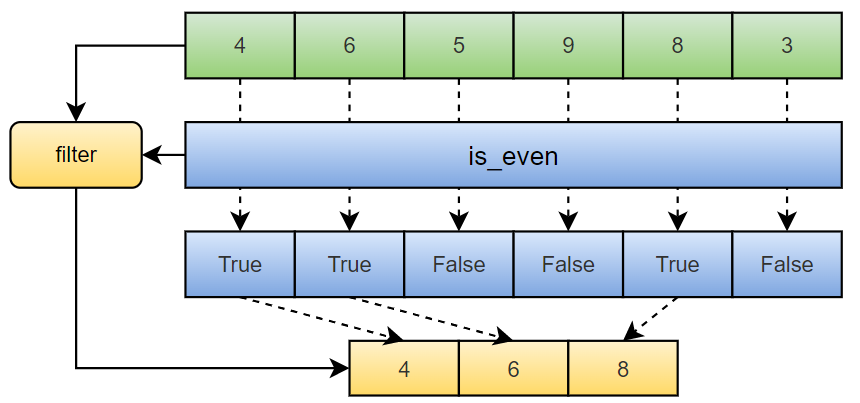

Объект filter также является итератором. Сохраним все элементы из него в список и напечатаем этот список:

In [14]:
print(list(even))

[4, 6, 8]


Функция is_even() тоже устроена довольно просто. Мы могли создать её и с помощью lambda-выражения при вызове filter(). Выражение x % 2 == 0 также возвращает True или False в зависимости от того, является ли число чётным.

In [15]:
lens_list = [4, 6, 5, 9, 8, 3] 
# Применяем lambda-функцию к каждому элементу списка
even = filter(lambda x: x % 2 == 0, lens_list)
print(list(even))

[4, 6, 8]


Таким образом, мы смогли в одну строку отобрать только те числа, которые делятся на 2. Для этого мы воспользовались функцией filter(), внутри которой создали временную lambda-функцию. Такой механизм называется созданием функций «налету».

В общем случае функция filter() может быть использована в тех случаях, когда у вас есть набор данных (в виде итерируемого объекта) и вам необходимо отбросить элементы, которые не проходят по условию (оценка меньше 70 баллов, нечётные числа, «битые» картинки или другие файлы).

Тогда вы можете создать отдельную функцию, которая будет возвращать True или False в зависимости от условия. Применив эту функцию к данным с помощью filter(), вы оставите в своих данных только те элементы, для которых функция вернула True.

Вы — сотрудник отдела разработки в МФЦ. МФЦ предоставляет некоторый спектр услуг многодетным семьям. Необходимо написать функционал, который позволяет отфильтровать среди всех запрашиваемых пользователем услуг (их количество произвольное) только те, которые предоставляются многодетным семьям.

Список услуг, предоставляемых многодетным семьям:

family_list = [
    
    'certificate of a large family',
    'social card',
    'maternity capital',
    'parking permit',
    'tax benefit',
    'reimbursement of expenses',
    "compensation for the purchase of children's goods"
    ]
Определите функцию family(), на вход которой подаётся произвольное количество аргументов (строки с названием услуг МФЦ), а в результате возвращается список услуг, которые могут быть оказаны только многодетной семье.

Для фильтрации входного списка аргументов используйте функцию filter().

Пример работы функции:

print(family('newborn registration', 'parking permit', 'maternity capital', 'tax benefit', 'medical policy'))

Должно быть выведено:
['parking permit', 'maternity capital', 'tax benefit']

In [51]:
family_list = [
    'certificate of a large family',
    'social card',
    'maternity capital',
    'parking permit',
    'tax benefit',
    'reimbursement of expenses',
    "compensation for the purchase of children's goods"
    ]
def family(elem):

  if elem  in  family_list:
    return True
  return False 

list_=['newborn registration','parking permit','maternity capital','tax benefit','medical policy']  

even = filter(family, list_)
print(list(even))



['parking permit', 'maternity capital', 'tax benefit']


In [4]:
family_list = [
    'certificate of a large family',
    'social card',
    'maternity capital',
    'parking permit',
    'tax benefit',
    'reimbursement of expenses',
    "compensation for the purchase of children's goods"
    ]
def family(*arg):
    def list_(elem):
       if elem in family_list:
         return True
       return False 
    list_ = list(filter(list_, arg))
    return list_



#вызов функции
print(family(
    'newborn registration',
    'parking permit',
    'maternity capital',
    'tax benefit',
    'medical policy'
    )
)


['parking permit', 'maternity capital', 'tax benefit']


In [74]:
def family(*args):
    for arg in args:
      if arg in family_list:
        print(True)
      print(False) 
  

#вызов функции
family(
    'newborn registration',
    'parking permit',
    'maternity capital',
    'tax benefit',
    'medical policy'
    )


False
True
False
True
False
True
False
False


In [30]:
print('parking permit' in family_list)

True


КОНВЕЙЕРЫ ИЗ MAP И FILTER

→ Иногда возникает задача выполнить сразу несколько действий с объектами из итератора. Например, вы хотите масштабировать данные об оценках вашей видеоигры пользователями, а затем отфильтровать оценки. Такие преобразования называются конвейерными.

Для этого необязательно каждый раз после применения map() или filter() получать список элементов. Объекты map и filter, как и любые другие итераторы, можно подставлять в эти же функции map() и filter(). 

Давайте вернёмся к нашей задаче об именах. Нам задан список имён names:

In [5]:
names = ['Ivan', 'Nikita', 'Simon', 'Margarita', 'Vasilisa', 'Kim']

Допустим, вначале мы хотим отобрать только те имена, которые состоят из пяти и более букв, а затем посчитать, сколько раз в таких словах встречается буква А. 

Отфильтруем наш список по условию len(x) >= 5 с помощью функции filter(). 

Напишем функцию, которая приводит имя к верхнему регистру с помощью метода строки upper(), а затем методом строки count() вычисляет количество символов 'A'. Функция возвращает кортеж (имя, число букв 'A'). Нашу функцию-преобразование применим к отфильтрованным данным с помощью map().

Конечный результат обернём в список с помощью функции list().
Наш конвейер, состоящий из filter() и map(), будет иметь вид:

In [6]:
# Отбираем имена из пяти и более букв
long_names = filter(lambda x: len(x) >= 5, names)
# Все отобранные имена переводим в верхний регистр и считаем число букв А в них
# Результат сохраняем в виде кортежа (имя, число букв "A")
count_a = map(lambda x: (x, x.upper().count('A')), long_names)
# Переводим объект map в list и печатаем его
print(list(count_a))
 
# Будет напечатано:
# [('Nikita', 1), ('Simon', 0), ('Margarita', 3), ('Vasilisa', 2)]

[('Nikita', 1), ('Simon', 0), ('Margarita', 3), ('Vasilisa', 2)]


In [9]:
list(filter(lambda x: len(x) >= 5, names))

['Nikita', 'Simon', 'Margarita', 'Vasilisa']

Выгодное отличие использования конвейеров без создания списков от итераторов заключается в повышении быстродействия скрипта. Вы не тратите время на распаковку содержимого итератора в список, и это существенно повышает производительность.

Те же самые действия мы могли выполнить и с помощью цикла, в котором пустой список заполняется кортежами из двух элементов:

In [10]:
names = ['Ivan', 'Nikita', 'Simon', 'Margarita', 'Vasilisa', 'Kim']
# Создаём пустой список, в который будем добавлять результаты
count_a = list()
# Создаём цикл по элементам списка names
for name in names:
    # Проверяем условие, что длина имени больше либо равна 5
    if len(name) >= 5:
        # Добавляем в итоговый список кортеж (имя, число букв "A")
        count_a.append((name, name.upper().count('A')))
print(count_a)

[('Nikita', 1), ('Simon', 0), ('Margarita', 3), ('Vasilisa', 2)]


Мы вновь занимаемся регистрацией пользователей. В нашем распоряжении имеется список кортежей reg. В каждом кортеже хранится информация о зарегистрированном пользователе и его дате рождения в формате (Фамилия, Имя, день, месяц, год):

reg = [('Ivanov', 'Sergej', 24, 9, 1995),

      ('Smith', 'John', 13, 2, 2003),

      ('Petrova', 'Maria', 13, 3, 2003)]

Выберите из списка reg только те записи, в которых год рождения пользователя 2000 и больше (2001, 2002 и т. д.). Из оставшихся записей составьте новый список кортежей, в котором фамилия и имя объединены в одну строку по следующему шаблону Фамилия И. (обратите внимание на точку после сокращения имени).

Например, для представленного списка reg результирующий список кортежей new_reg должен иметь вид:

new_reg = [('Smith J.', 13, 2, 2003), ('Petrova M.', 13, 3, 2003)]

Для решения задачи используйте конвейер из filter()и map().

Примечание. Обратите внимание, что нам дана двумерная структура, то есть функции фильтрации и преобразования, указываемые в аргументах в filter() и map(), принимают на вход один кортеж и должны обрабатывать его.

В результате работы вашей программы должен быть создан обновлённый список кортежей с именем переменной new_reg.

In [11]:
reg = [('Ivanov', 'Sergej', 24, 9, 1995),
      ('Smith', 'John', 13, 2, 2003),
      ('Petrova', 'Maria', 13, 3, 2003)]

In [15]:
reg[-1][-1]

2003

In [17]:
list(filter(lambda x: reg[-1][-1] 2000, reg))

[]

In [22]:
def filt(elem):
   if 2000 < elem[-1]:
         return True
   return False 
list_ = list(filter(filt,reg))
list_



[('Smith', 'John', 13, 2, 2003), ('Petrova', 'Maria', 13, 3, 2003)]

In [31]:
type(reg[-1]),reg[-1]

(tuple, ('Petrova', 'Maria', 13, 3, 2003))

In [45]:
reg[-1][0][0]+"."+reg[-1][1]

'P.Maria'

In [54]:
new_reg=list(filter(filt,reg))

def new_reg_(tuple):
   new=[]
   new.append(tuple[0][0]+"."+tuple[1])
   new.append(tuple[2])
   new.append(tuple[3])
   new.append(tuple[4])
   return new

new_reg = map(lambda x: new_reg_(x), new_reg)
# Переводим объект map в list и печатаем его
print(list(new_reg))

[['S.John', 13, 2, 2003], ['P.Maria', 13, 3, 2003]]


In [76]:
new_=tuple()

In [77]:
new_=(*new_, 'd')

In [78]:
new_ 

('d',)

In [80]:
new_reg=list(filter(filt,reg))

def new_reg_(tuple):
   new=[]
   new.append(tuple[0][0]+"."+tuple[1])
   new.append(tuple[2])
   new.append(tuple[3])
   new.append(tuple[4])
   return new

new_reg = map(lambda x: tuple(new_reg_(x)), new_reg)
# Переводим объект map в list и печатаем его
print(list(new_reg))

[('S.John', 13, 2, 2003), ('P.Maria', 13, 3, 2003)]


ФУНКЦИЯ ZIP

→ Иногда возникает необходимость одновременно получать и обрабатывать элементы из нескольких последовательностей. Представьте, что перед вами несколько параллельных линий конвейера, по каждой из которых идёт отдельная продукция, и вам необходимо следить за каждой из этих линий.

Пример из профессии: у вас может возникнуть задача по порядку получать из разных баз данных элементы, которые на самом деле являются смысловыми парами: например, товары и их цены, покупатели и их покупки, студенты и их баллы за экзамен и т. д.

Для такого совместного использования нескольких коллекций объектов предусмотрена функция zip(). Она принимает в качестве аргументов через запятую итерируемые объекты.

Результат работы функции zip() — специальный итератор zip. При требовании получить следующий объект (вызове next()) итератор выдаёт кортеж, в котором по порядку перечислено по одному объекту из каждого аргумента.

В итоге мы получаем параллельную обработку нескольких коллекций объектов сразу.

Рассмотрим пример задачи.

Пусть данные о фамилиях и отчествах студентов по каким-то причинам хранятся в разных местах, например в двух разных списках. Нам бы хотелось вывести их попарно на экран.

Создадим два списка: в одном будут фамилии, в другом — имена студентов.

Чтобы напечатать их попарно, получим из них объект zip и пройдёмся по нему в цикле for. На каждой итерации цикла объект zip будет возвращать кортеж из двух элементов — фамилии и имени. Для удобства кортеж из элементов zip мы сразу же распаковываем в цикле в понятные переменные surname и name.

Итоговый код:

In [81]:
surnames = ['Ivanov', 'Smirnov', 'Kuznetsova', 'Nikitina']
names = ['Sergej', 'Ivan', 'Maria', 'Elena']
# Создаём цикл по элементам итератора zip — кортежам из фамилий и имён
for surname, name in zip(surnames, names):
    print(surname, name)
# Будет напечатано:
# Ivanov Sergej
# Smirnov Ivan
# Kuznetsova Maria
# Nikitina Elena

Ivanov Sergej
Smirnov Ivan
Kuznetsova Maria
Nikitina Elena


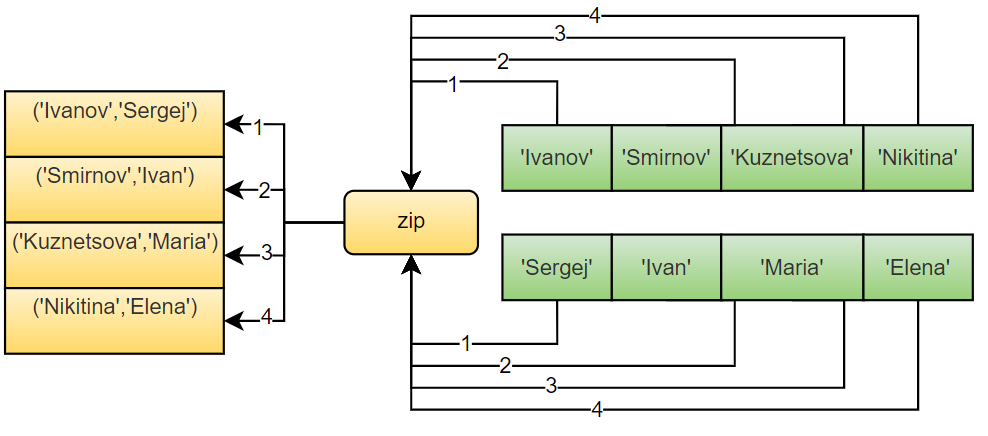

Важное замечание:
 zip перестаёт выдавать элементы тогда, когда заканчиваются элементы в самом коротком итераторе.

Например, мы потеряли половину списка имён, но список фамилий при этом не поменялся:

In [82]:
surnames = ['Ivanov', 'Smirnov', 'Kuznetsova', 'Nikitina']
names = ['Sergej', 'Ivan']

In [83]:
# Создаём цикл по элементам итератора zip — кортежам из фамилий и имён
for surname, name in zip(surnames, names):
    print(surname, name)
 

Ivanov Sergej
Smirnov Ivan


Как видите, напечатано только две строки, поскольку в списке names содержалось только два имени.

→ Используйте объект zip, когда требуется получить наборы объектов из нескольких итерируемых объектов и обрабатывать их одновременно.

In [84]:
a = [1,3,5,6,7]
b = ['A', 'B', 'C']
 
for x, y in zip(a, b):
    print(x, y)

1 A
3 B
5 C
